# LTC details: normalized (max score)

In [1]:
%matplotlib inline

import pandas as pd
import pylab
import matplotlib.pyplot as plt
import openpyxl

In [2]:
df = pd.read_csv("../../data/processed/result_detail_ltc.csv",delimiter=";")
df.head()

,id_node,lvl,ltc
0,128656,0,4
1,128656,1,7676
2,128656,2,9455
3,128656,3,9707
4,128656,4,9747


In [3]:
# Normalize lineal_threshold
df['ltc'] = df['ltc'].astype(float)
df['ltc'] = (df['ltc'] / 53015)
df.head()

,id_node,lvl,ltc
0,128656,0,0.000075
1,128656,1,0.144789
2,128656,2,0.178346
3,128656,3,0.183099
4,128656,4,0.183854


In [4]:
# For each node group by id_node and select the last level
df2 = df.groupby(['id_node']).last()
df2.head()

,lvl,ltc
id_node,,
2,2,0.000490
3,2,0.001132
4,5,0.270093
5,1,0.000472
6,1,0.001584


In [5]:
df2.groupby(['lvl']).size()

lvl
0     42129
1     63189
2     73260
3     51118
4     11516
5     14861
6       211
7       171
8        22
9         8
10        4
12        2
dtype: int64

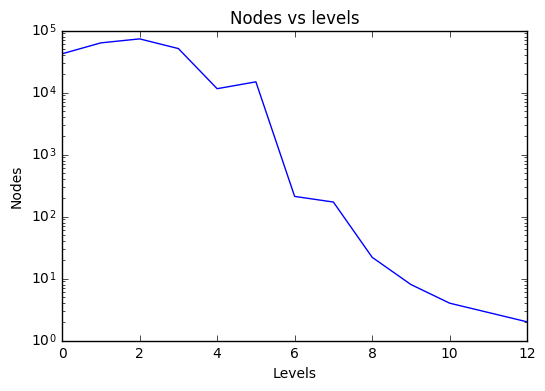

In [6]:
df2[['lvl','ltc']].groupby(['lvl']).size().plot(logy=True)

pylab.title("Nodes vs levels")
pylab.xlabel("Levels")
_ = pylab.ylabel("Nodes")

In [7]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [8]:
print_full(df2[['lvl','ltc']].groupby(['lvl']).describe())

                    ltc
lvl                    
0   count  42129.000000
    mean       0.000034
    std        0.000076
    min        0.000019
    25%        0.000019
    50%        0.000019
    75%        0.000019
    max        0.003640
1   count  63189.000000
    mean       0.000607
    std        0.001279
    min        0.000038
    25%        0.000075
    50%        0.000189
    75%        0.000585
    max        0.016750
2   count  73260.000000
    mean       0.004855
    std        0.005359
    min        0.000057
    25%        0.001151
    50%        0.002886
    75%        0.006545
    max        0.043648
3   count  51118.000000
    mean       0.025506
    std        0.024628
    min        0.000075
    25%        0.007507
    50%        0.017184
    75%        0.035952
    max        0.204961
4   count  11516.000000
    mean       0.021633
    std        0.025178
    min        0.000170
    25%        0.007620
    50%        0.012855
    75%        0.023880
    max        0

In [9]:
df2[['lvl','ltc']].corr()

,lvl,ltc
lvl,1.000000,0.673117
ltc,0.673117,1.000000


In [10]:
df2[['lvl','ltc']].corr(method="spearman")

,lvl,ltc
lvl,1.000000,0.893708
ltc,0.893708,1.000000


In [11]:
df2[['lvl','ltc']].corr(method="kendall")

,lvl,ltc
lvl,1.000000,0.773618
ltc,0.773618,1.000000
